In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
# import modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn

In [37]:
def get_default_device():
    '''Pick gpu if available else pick cpu'''
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    '''Move tensors to choosen device'''
    if isinstance(data, (list, tuple)):
        return [to_device(d, device) for d in data]
    return data.to(device, non_blocking=True)

In [36]:
device = get_default_device()

In [58]:
eeg_data = pd.read_csv("drive/MyDrive/UNI-AMRITA-SEM2/IoTforAI/EEG_stress_companion_Iot_project/emotions.csv")
eeg_data.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  mean_d_0_a2  mean_d_1_a2  mean_d_2_a2  \
0      -15.70        2.06        3.15         2.15         29.5       -353.0   
1        2.88        3.83       -4.82        25.60         32.8         29.6   
2       90.20       89.90        2.03         7.75         30.1       -441.0   
3        8.82        2.30       -1.97        17.30         32.0       -148.0   
4        3.06       41.40        5.52        26.10         34.3         43.7   

   mean_d_3_a2  mean_d_4_a2  mean_d_5_a  mean_d_6_a  mean_d_7_a  mean_d_8_a  \
0        14.40         21.5        5.98        30.7      -343.0        14.7   
1        21.50         17.4       25.50        31.7        31.5        26.2   
2         9.89         25.3      -68.90        25.3      -481.0       -65.4   
3        20.40         22.8       13.20        31.5      -147.0        16.9   
4        23.70         20.6       -3.87        34.1        43.7       -10.0   

   mean_d_9_a  mean_d_10_a  mean_d_11_a  mean_d_12_a  mean_d_13_a  \
0        27.9         3.17         32.2       -368.0         15.9   
1        32.9        31.80         33.1         33.2         28.5   
2        20.0        79.80         31.0       -408.0         91.9   
3        27.7        15.70         30.7       -142.0         20.7   
4        22.9        59.40         26.7         60.3         64.7   

   mean_d_14_a  mean_d_15_a  mean_d_16_a  mean_d_17_a  mean_d_18_a  \
0         36.4         7.08         28.8       -359.0         17.3   
1         26.8        32.40         34.7         33.8         27.0   
2         29.5        18.80         31.1       -335.0         32.2   
3         22.8        13.60         32.2       -135.0         21.2   
4         26.9        32.30         30.1         33.6         31.6   

   mean_d_19_a  mean_d_20_a  mean_d_21_a  mean_d_22_a  mean_d_23_a  \
0         19.6      -3.8300       -1.230    -10.80000       -0.363   
1         14.2       0.0342        1.100     -1.87000       -4.690   
2         19.9      76.6000        4.850     39.90000       75.300   
3         23.8       4.1500        0.556     -0.35400        3.460   
4         27.7      30.0000        0.276     -0.00677       33.700   

   mean_d_24_a  mean_d_25_a  mean_d_26_a  mean_d_27_a  mean_d_28_a  \
0        -6.41        -1.03       -2.780        14.60       -1.540   
1       -15.40        -6.22       -0.328        -3.53       -6.980   
2         5.27       -72.00       -0.843       -33.00      -82.000   
3        -4.96         1.63        1.330        -5.83       -0.298   
4        -2.36       -33.30        7.640       -16.60      -41.100   

   mean_d_29_a  mean_d_30_a  mean_d_31_a  mean_d_32_a  mean_d_33_a  \
0   -14.900000        -4.94        0.664         5.82       -2.920   
1    -9.370000        -6.85       -1.890        -4.13       -5.460   
2    -4.200000       -11.00       -0.972      -106.00      -22.300   
3     0.000777         3.71       -0.176       -12.10       -0.784   
4    -6.290000        -6.21        4.260        10.10       -7.930   

   mean_d_34_a  mean_d_35_a  mean_d_36_a  mean_d_37_a  mean_d_38_a  \
0         1.90         2.80       -1.550        25.50        -1.18   
1         3.20        -6.25       -1.430        -1.65        -2.28   
2         5.36      -149.00       -5.690       -72.90      -157.00   
3        -1.07        -2.52        0.771        -5.48        -3.75   
4        -7.14       -63.30        7.360       -16.60       -74.80   

   mean_d_39_a  mean_d_40_a  mean_d_41_a

In [59]:
eeg_data.shape

(2132, 2549)

 Checking if the data is balanced

In [60]:
labels = eeg_data['label'].value_counts()
labels

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

Replacing the labels more with apt ones.

In [61]:
eeg_data['label'] = eeg_data['label'].replace(['NEUTRAL', 'NEGATIVE', 'POSITIVE'],['CALM', 'STRESSED', 'GOOD-MOOD'])

In [63]:
labels = eeg_data['label'].value_counts()
labels

CALM         716
STRESSED     708
GOOD-MOOD    708
Name: label, dtype: int64

## Exploring principal components

In [65]:
pca = PCA(10).fit(eeg_data.drop('label', axis=1))
explained_variance = pca.explained_variance_ratio_

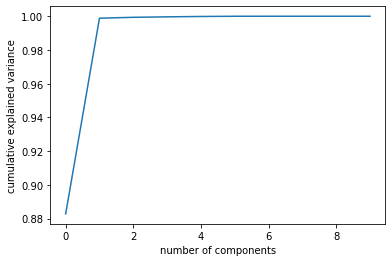

In [66]:
# plot
plt.plot(np.cumsum(explained_variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [67]:
first_c = pca.components_[0]
second_c = pca.components_[1]

## Data Preprocessing

In [69]:
# do not change original dataset
eeg_data_copy = eeg_data.copy()

In [71]:
# label encoding
eeg_data['label'] = eeg_data['label'].astype('category').cat.codes

In [73]:
# split data into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(eeg_data.drop('label', axis=1), eeg_data['label'], random_state=42, test_size=0.2, stratify=eeg_data['label'])

In [74]:
y_train.value_counts()

0    573
2    566
1    566
Name: label, dtype: int64

In [75]:
y_test.value_counts()

0    143
2    142
1    142
Name: label, dtype: int64

In [76]:
# convert test to numpy
y_test = y_test.to_numpy()
# convert to numpy arrays
inputs_array = X_train.to_numpy()
targets_array = y_train.to_numpy()

In [77]:
# convert to tensors
inputs = to_device(torch.FloatTensor(inputs_array),device)
targets = to_device(torch.FloatTensor(targets_array), device)

## Building a Model

In [131]:
# define batch size
batch_size = 128

In [132]:
# build a GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(GRUModel, self).__init__()

        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        self.gru = nn.GRU(input_size, hidden_dim, n_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_dim, output_size).float()
        self.relu = nn.ReLU()
        
    def forward(self, x):
        out, h = self.gru(x)
        out = self.fc(self.relu(out))
        return out, h
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()
        return hidden

In [133]:
# build an LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(LSTMModel, self).__init__()

        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_dim, output_size).float()
        self.relu = nn.ReLU()
        
    def forward(self, x):
        out, h = self.lstm(x)
        out = self.fc(self.relu(out))
        return out, h
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()
        return hidden

In [134]:
input_size = len(X_train.columns)
output_size = len(y_train.unique())
hidden_dim = 128
n_layers = 2
# init hyperparameters
n_epochs = 430
# init model
GRUmodel = GRUModel(input_size, output_size, hidden_dim, n_layers)
LSTMmodel = LSTMModel(input_size, output_size, hidden_dim, n_layers)

In [135]:
to_device(GRUmodel, device)

GRUModel(
  (gru): GRU(2548, 128, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=128, out_features=3, bias=True)
  (relu): ReLU()
)

In [136]:
to_device(LSTMmodel, device)

LSTMModel(
  (lstm): LSTM(2548, 128, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=128, out_features=3, bias=True)
  (relu): ReLU()
)

In [137]:
#Training the GRU Model
#define loss and optimizer
losses = []
l_rates = [1e-1, 1e-2, 1e-3, 1e-4]
l_r_i = 2
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(GRUmodel.parameters(), l_rates[l_r_i])
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.01)
for epoch in range(1, n_epochs + 1):
    optimizer.zero_grad() 
    output, hidden = GRUmodel(inputs.unsqueeze(0))
    loss = criterion(output.squeeze(0).float(), targets.long())
    loss_detached = loss.detach().cpu().clone().numpy()
    losses.append(loss_detached)

    loss.backward() 
    optimizer.step()

    if epoch%10 == 0:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/430............. Loss: 0.9723
Epoch: 20/430............. Loss: 0.8210
Epoch: 30/430............. Loss: 0.7147
Epoch: 40/430............. Loss: 0.6592
Epoch: 50/430............. Loss: 0.6237
Epoch: 60/430............. Loss: 0.5967
Epoch: 70/430............. Loss: 0.5744
Epoch: 80/430............. Loss: 0.5593
Epoch: 90/430............. Loss: 0.5479
Epoch: 100/430............. Loss: 0.5228
Epoch: 110/430............. Loss: 0.5148
Epoch: 120/430............. Loss: 0.4949
Epoch: 130/430............. Loss: 0.4627
Epoch: 140/430............. Loss: 0.4514
Epoch: 150/430............. Loss: 0.4355
Epoch: 160/430............. Loss: 0.4129
Epoch: 170/430............. Loss: 0.3895
Epoch: 180/430............. Loss: 0.3701
Epoch: 190/430............. Loss: 0.3449
Epoch: 200/430............. Loss: 0.3224
Epoch: 210/430............. Loss: 0.3037
Epoch: 220/430............. Loss: 0.2760
Epoch: 230/430............. Loss: 0.2517
Epoch: 240/430............. Loss: 0.2375
Epoch: 250/430...........

In [138]:
#Training the LSTM Model
losses = []
optimizer = torch.optim.Adam(LSTMmodel.parameters(), l_rates[l_r_i])
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.01)
for epoch in range(1, n_epochs + 1):
    optimizer.zero_grad() 
    output, hidden = LSTMmodel(inputs.unsqueeze(0))
    loss = criterion(output.squeeze(0).float(), targets.long())
    loss_detached = loss.detach().cpu().clone().numpy()
    losses.append(loss_detached)

    loss.backward() 
    optimizer.step()

    if epoch%10 == 0:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/430............. Loss: 0.9610
Epoch: 20/430............. Loss: 0.7633
Epoch: 30/430............. Loss: 0.6728
Epoch: 40/430............. Loss: 0.6421
Epoch: 50/430............. Loss: 0.6242
Epoch: 60/430............. Loss: 0.6000
Epoch: 70/430............. Loss: 0.5890
Epoch: 80/430............. Loss: 0.5714
Epoch: 90/430............. Loss: 0.5494
Epoch: 100/430............. Loss: 0.5322
Epoch: 110/430............. Loss: 0.5077
Epoch: 120/430............. Loss: 0.4913
Epoch: 130/430............. Loss: 0.4772
Epoch: 140/430............. Loss: 0.4486
Epoch: 150/430............. Loss: 0.4230
Epoch: 160/430............. Loss: 0.4101
Epoch: 170/430............. Loss: 0.3854
Epoch: 180/430............. Loss: 0.3613
Epoch: 190/430............. Loss: 0.3309
Epoch: 200/430............. Loss: 0.3155
Epoch: 210/430............. Loss: 0.2995
Epoch: 220/430............. Loss: 0.2759
Epoch: 230/430............. Loss: 0.2676
Epoch: 240/430............. Loss: 0.2447
Epoch: 250/430...........

## Prediction and Testing

In [139]:
test_data = to_device(torch.FloatTensor(X_test.to_numpy()).unsqueeze(0), device)
output = GRUmodel(test_data)[0]
output = output.squeeze(0)
output_ = output.detach().cpu().clone()
predictions = np.array(torch.argmax(output_, 1, keepdim=True))

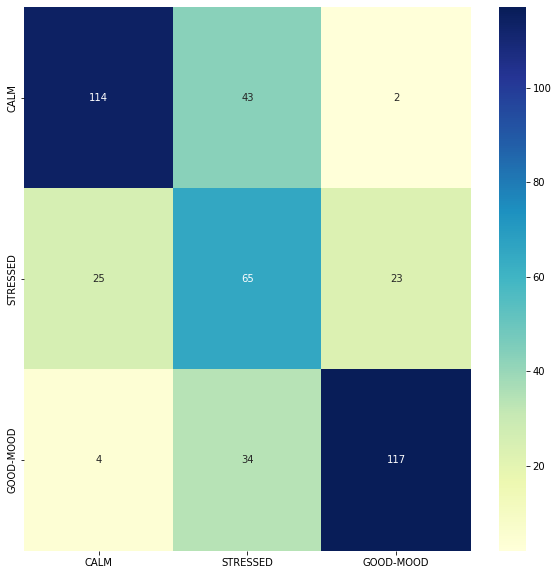

In [140]:
c_m = confusion_matrix(predictions, y_test)

plt.figure(figsize=(10, 10))
sbn.heatmap(c_m, annot=True, cmap='YlGnBu', fmt='g', yticklabels=list(labels.index), xticklabels=list(labels.index))

In [141]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.80      0.75       143
           1       0.58      0.46      0.51       142
           2       0.75      0.82      0.79       142

    accuracy                           0.69       427
   macro avg       0.68      0.69      0.68       427
weighted avg       0.68      0.69      0.68       427



In [142]:
test_data = to_device(torch.FloatTensor(X_test.to_numpy()).unsqueeze(0), device)
output = LSTMmodel(test_data)[0]
output = output.squeeze(0)
output_ = output.detach().cpu().clone()
predictions = np.array(torch.argmax(output_, 1, keepdim=True))

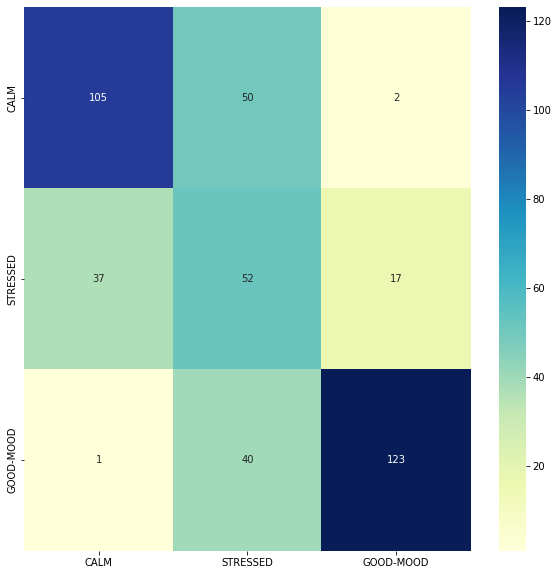

In [143]:
c_m = confusion_matrix(predictions, y_test)

plt.figure(figsize=(10, 10))
sbn.heatmap(c_m, annot=True, cmap='YlGnBu', fmt='g', yticklabels=list(labels.index), xticklabels=list(labels.index))

In [144]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       143
           1       0.49      0.37      0.42       142
           2       0.75      0.87      0.80       142

    accuracy                           0.66       427
   macro avg       0.64      0.66      0.64       427
weighted avg       0.64      0.66      0.64       427



## Code snippet to run prediction on an incoming sample

In [149]:
test_array = np.ones((1, 2548))
test_point = to_device(torch.FloatTensor(test_array),device)
output = GRUmodel(test_point)[0]
print(output)
output_ = output.detach().cpu().clone()
prediction = torch.argmax(output_, 1, keepdim=True)

tensor([[-0.7403,  0.0990,  0.7803]], grad_fn=<AddmmBackward0>)


In [150]:
prediction

tensor([[2]])